# Web scraping Pubmed

In [180]:
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep
import re
import pandas as pd

In [181]:
%cd D:\Pum_Program\HDS_WORK\Year 3\web_scraping

D:\Pum_Program\HDS_WORK\Year 3\web_scraping


## Setup driver

In [182]:
driver = webdriver.Edge(executable_path='./msedgedriver')
driver.implicitly_wait(30)

<ipython-input-182-290804869c79>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Edge(executable_path='./msedgedriver')


## Setup website

In [183]:
pubmed_site = "https://pubmed.ncbi.nlm.nih.gov/"
driver.get(pubmed_site)
soup = BeautifulSoup(driver.page_source,'html.parser')


## Process

In [203]:
soup = BeautifulSoup(driver.page_source,'html.parser')
total_pages = soup.select('label[class="of-total-pages"]')
total_pages

[<label class="of-total-pages">of 2,411</label>,
 <label class="of-total-pages">of 2,411</label>]

In [208]:
key = input('Search Keys : ')
Name = []
PMID = []
publication = []

def scraping(key):
    pubmed_site = "https://pubmed.ncbi.nlm.nih.gov/"
    driver.get(pubmed_site)
    #input words to searching box
    search = driver.find_element_by_class_name('term-input')
    send = search.send_keys(key)
    
    #click search button
    btn_search = driver.find_element_by_class_name('search-btn')
    btn_search.click()
    
    #filter with 5 year button publication date
    y5_research = driver.find_element_by_xpath('//label[@for="id_filter_datesearch.y_1"]')
    y5_research.click()
    
    soup = BeautifulSoup(driver.page_source,'html.parser')
    total_pages = soup.select('label[class="of-total-pages"]')
    num_pages = total_pages[0].get_text()
    text = num_pages.replace(',','')
    
    get_num = re.findall('[0-9]+',text)
    search_numpages = int(get_num[0])
    
    
    for i in range(search_numpages-1):
    
        #scraping
        soup = BeautifulSoup(driver.page_source,'html.parser')

        #Paper Name
        names_research = soup.select('a[class="docsum-title"]')
        for name in names_research:
            text = name.get_text()
            keep_text = re.compile("[^0-9a-zA-Z -]") #pattern keep 0-9 A-Z upper case a-z lower case space and -
            text = keep_text.sub('',text) #replace with ''
            text = text.strip(' ') #remove space
            Name.append(text)
        #print(Name)

        #PMID
        pmids = soup.select('span[class=docsum-pmid]')
        for num in pmids:
            text = num.get_text()
            PMID.append(text)
        #print(PMID)

        #publication
        pubs = soup.select('span[class="docsum-journal-citation full-journal-citation"]')
        for date in pubs:
            text = date.get_text()
            text = re.findall(r'[\d]{4} [\w]{3} [\d]+',text)
            publication.append(text)

        next_page = driver.find_element_by_xpath('//img[@alt="next page"]')
        next_page.click()

        # clear text searching box
    #clear_search = driver.find_element_by_class_name('clear-btn')
    #clear_search.click()
    driver.get(pubmed_site)
    
scraping(key)

    

Search Keys : Medical Image processing


<ipython-input-208-8d9e618ac735>:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search = driver.find_element_by_class_name('term-input')
<ipython-input-208-8d9e618ac735>:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  btn_search = driver.find_element_by_class_name('search-btn')
<ipython-input-208-8d9e618ac735>:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  y5_research = driver.find_element_by_xpath('//label[@for="id_filter_datesearch.y_1"]')
<ipython-input-208-8d9e618ac735>:59: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  next_page = driver.find_element_by_xpath('//img[@alt="next page"]')


ElementNotInteractableException: Message: element not interactable
  (Session info: MicrosoftEdge=97.0.1072.55)
Stacktrace:
Backtrace:
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6BC5A6942+360450]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6BC1AA5B7+884759]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6BC1E7B46+1136038]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6BC1D9017+1075831]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6BC201C2A+1242762]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6BC1D8614+1073268]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6BC201D90+1243120]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6BC21679C+1327612]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6BC201A93+1242355]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6BC1D6F80+1067488]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6BC1D80A8+1071880]
	Ordinal0 [0x00007FF6BC035ED3+24275]
	Microsoft::Applications::Events::LogManagerProvider::CreateLogManager [0x00007FF6BC2B6E97+277031]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6BC480F62+2946]
	Microsoft::Applications::Events::LogManagerProvider::CreateLogManager [0x00007FF6BC2806DC+53868]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6BC59BAE3+315811]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6BC59B424+314084]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6BC59B26D+313645]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6BC4F4D83+477603]
	BaseThreadInitThunk [0x00007FF855817034+20]
	RtlUserThreadStart [0x00007FF856CC2651+33]


## clear text-box searching

In [130]:
clear_search = driver.find_element_by_class_name('clear-btn')
clear_search.click()

<ipython-input-130-7d8ae5778da5>:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  clear_search = driver.find_element_by_class_name('clear-btn')


In [163]:
s = '2020 Jan;50(1):98-106. doi: 10.1007/s00247-019-04518-x. Epub 2019 Oct 2.'
pp = re.findall(r'[\d]{4} [\w]{3} [\d]+',s)
pp

['2019 Oct 2']

In [224]:
print(len(publication))
print(len(PMID))
print(len(Name))

7380
7380
7380


In [227]:
pandas = {'Name':Name,'PMID':PMID,'Publication':publication}

In [228]:
show = pd.DataFrame(pandas)
show

,Name,PMID,Publication
0,Medical image processing and COVID-19 A litera...,34836799,[2021 Nov 17]
1,Recent advances in medical image processing fo...,33517241,[2021 Jan 9]
2,nnU-Net a self-configuring method for deep lea...,33288961,[2020 Dec 7]
3,Medical image fusion based on hybrid three-lay...,33360260,[2020 Dec 17]
4,Application of CNN Algorithm Based on Chaotic ...,34539771,[2021 Sep 8]
...,...,...,...
7375,In vivo human whole-brain Connectom diffusion ...,33927203,[2021 Apr 29]
7376,One-pot synthesis of carboxymethyl-dextran coa...,34116153,[2021 Jun 9]
7377,Astrocytic outer retinal layer thinning is not...,34711650,[2021 Oct 28]
7378,CT Radiomic Features of Superior Mesenteric Ar...,34491129,[2021 Sep 7]


In [241]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [232]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [244]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [246]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [220]:
def keep_text(text):
    symbol = re.compile("[^0-9a-zA-Z ]")
    text = symbol.sub('',text)
    return text

In [249]:
import nltk

stop_words = set(nltk.corpus.stopwords.words('english'))

In [229]:
show['Name'] = show['Name'].apply(keep_text)

In [251]:
show['tokens'] = show['Name'].apply(prepare,pipeline=pipeline)

In [253]:
show['bigrams'] = show['tokens'].apply(ngrams,stopwords=stop_words)

In [254]:
show

,Name,PMID,Publication,tokens,bigrams
0,Medical image processing and COVID19 A literat...,34836799,[2021 Nov 17],"[medical, image, processing, covid19, literatu...","[medical image, image processing, processing c..."
1,Recent advances in medical image processing fo...,33517241,[2021 Jan 9],"[recent, advances, medical, image, processing,...","[recent advances, advances medical, medical im..."
2,nnUNet a selfconfiguring method for deep learn...,33288961,[2020 Dec 7],"[nnunet, selfconfiguring, method, deep, learni...","[nnunet selfconfiguring, selfconfiguring metho..."
3,Medical image fusion based on hybrid threelaye...,33360260,[2020 Dec 17],"[medical, image, fusion, based, hybrid, threel...","[medical image, image fusion, fusion based, ba..."
4,Application of CNN Algorithm Based on Chaotic ...,34539771,[2021 Sep 8],"[application, cnn, algorithm, based, chaotic, ...","[application cnn, cnn algorithm, algorithm bas..."
...,...,...,...,...,...
7375,In vivo human wholebrain Connectom diffusion M...,33927203,[2021 Apr 29],"[vivo, human, wholebrain, connectom, diffusion...","[vivo human, human wholebrain, wholebrain conn..."
7376,Onepot synthesis of carboxymethyldextran coate...,34116153,[2021 Jun 9],"[onepot, synthesis, carboxymethyldextran, coat...","[onepot synthesis, synthesis carboxymethyldext..."
7377,Astrocytic outer retinal layer thinning is not...,34711650,[2021 Oct 28],"[astrocytic, outer, retinal, layer, thinning, ...","[astrocytic outer, outer retinal, retinal laye..."
7378,CT Radiomic Features of Superior Mesenteric Ar...,34491129,[2021 Sep 7],"[ct, radiomic, features, superior, mesenteric,...","[ct radiomic, radiomic features, features supe..."


In [249]:
import nltk

stop_words = set(nltk.corpus.stopwords.words('english'))

In [243]:
text = 'nnU Net a self configuring method for deep learning based biomedical image segmentation'
a = tokenize(text)
a

['nnU',
 'Net',
 'a',
 'self',
 'configuring',
 'method',
 'for',
 'deep',
 'learning',
 'based',
 'biomedical',
 'image',
 'segmentation']

In [215]:
show.loc[2]['Name']

'nnU-Net a self-configuring method for deep learning-based biomedical image segmentation'

In [218]:
s = 'nnU-Net a self-configuring method for deep learning-based biomedical image segmentation'
symbol = re.compile('[^0-9a-zA-Z ]')
text = symbol.sub('',s)
text

'nnUNet a selfconfiguring method for deep learningbased biomedical image segmentation'

In [261]:
from collections import Counter

In [282]:
bigrams = show['bigrams'].explode().values

In [283]:
count_bi = Counter(bigrams)

In [308]:
count_bi.most_common(60)

[('magnetic resonance', 280),
 ('computed tomography', 263),
 ('convolutional neural', 203),
 ('neural network', 194),
 ('resonance imaging', 159),
 ('neural networks', 149),
 ('image segmentation', 112),
 ('artificial intelligence', 111),
 ('image analysis', 99),
 ('image reconstruction', 93),
 ('image quality', 91),
 ('machine learning', 91),
 ('generative adversarial', 86),
 ('ct images', 73),
 ('optical coherence', 68),
 ('breast cancer', 67),
 ('coherence tomography', 65),
 ('systematic review', 50),
 ('using 3d', 49),
 ('tumor segmentation', 47),
 ('automatic segmentation', 47),
 ('dualenergy ct', 47),
 ('adversarial networks', 45),
 ('lung cancer', 45),
 ('deep convolutional', 44),
 ('ultrasound images', 44),
 ('image registration', 42),
 ('white matter', 42),
 ('compressed sensing', 41),
 ('adversarial network', 39),
 ('brain tumor', 39),
 ('3d imaging', 39),
 ('human brain', 39),
 ('using threedimensional', 37),
 ('segmentation using', 36),
 ('transfer learning', 36),
 ('diffu

In [304]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [305]:
wc = WordCloud(width = 800, height = 400,
              background_color = "black", colormap="Paired",
              max_font_size = 150, max_words = 200)

(-0.5, 799.5, 399.5, -0.5)

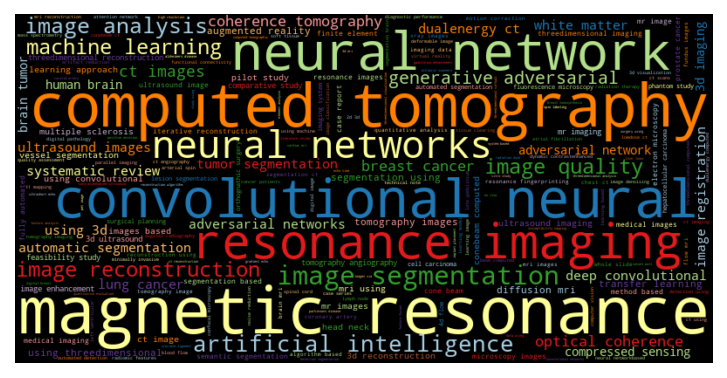

In [309]:
wc.generate_from_frequencies(count_bi) #data counting years 1970 - 1990 from 1.
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')